In [1]:
import pandas as pd

df = pd.read_csv("diamonds.csv", index_col=0)

df.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [2]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
df.duplicated().sum()

146

In [4]:
df = df.drop_duplicates()

In [5]:
df.describe()

carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

In [6]:
from sklearn.preprocessing import LabelEncoder

le_cut = LabelEncoder()
le_cut.fit(df['cut']) 

le_color = LabelEncoder()
le_color.fit(df['color']) 

le_clarity = LabelEncoder()
le_clarity.fit(df['clarity']) 

df['cut_num'] = le_cut.transform(df['cut']) 
df['color_num'] = le_color.transform(df['color']) 
df['clarity_num'] = le_clarity.transform(df['clarity']) 

In [7]:
df.drop(['cut',	'color',	'clarity'], axis = 1, inplace=True)
X = df.drop('price', axis=1)
y = df['price']

In [8]:
X.head()

carat  depth  table     x     y     z  cut_num  color_num  clarity_num
1   0.23   61.5   55.0  3.95  3.98  2.43        2          1            3
2   0.21   59.8   61.0  3.89  3.84  2.31        3          1            2
3   0.23   56.9   65.0  4.05  4.07  2.31        1          1            4
4   0.29   62.4   58.0  4.20  4.23  2.63        3          5            5
5   0.31   63.3   58.0  4.34  4.35  2.75        1          6            3

In [9]:
y.head()

1    326
2    326
3    327
4    334
5    335
Name: price, dtype: int64

In [10]:
X['cut_num'].value_counts()

cut_num
2    21488
3    13748
4    12069
1     4891
0     1598
Name: count, dtype: int64

In [11]:
X['clarity_num'].value_counts()

clarity_num
2    13032
5    12229
3     9150
4     8156
7     5056
6     3647
1     1784
0      740
Name: count, dtype: int64

In [12]:
X['color_num'].value_counts()

color_num
3    11262
1     9776
2     9520
4     8272
0     6755
5     5407
6     2802
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 16689.95279179035
Coefficients: [11037.39045412  -163.38356341   -93.72845796 -1279.23819145
    19.2345536    151.52985393    69.33904709  -265.90297822
   288.32575033]


In [14]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print ('MSE :', round(mean_squared_error (y_pred, y_test), 2))
print ('RMSE :', round(sqrt(mean_squared_error (y_pred, y_test)), 2))
print ('MAE :', round(mean_absolute_error(y_pred, y_test), 2))

MSE : 1839266.07
RMSE : 1356.2
MAE : 856.42


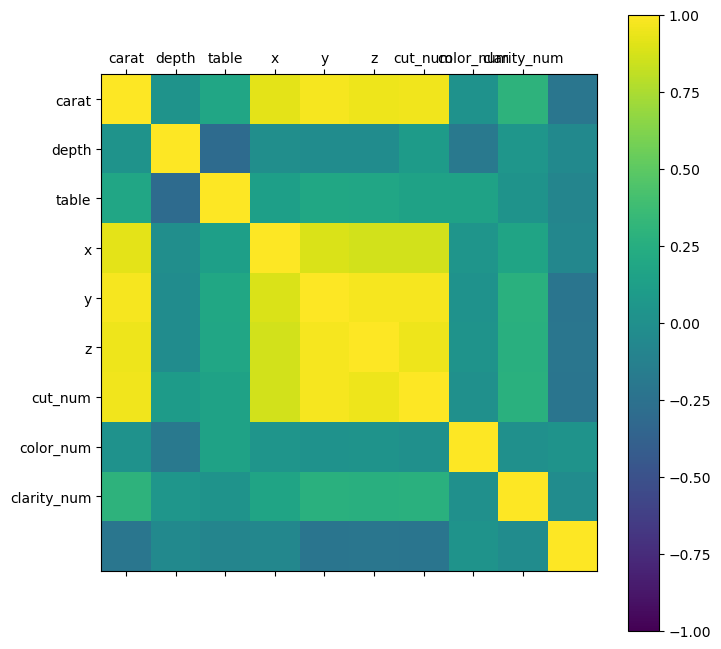

In [15]:
import matplotlib.pyplot as plt

correlations = df.corr(method='pearson')
 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7,8]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(['carat',	'depth',	'table',	'x',	'y',	'z',	'cut_num',	'color_num',	'clarity_num'])
ax.set_yticklabels(['carat',	'depth',	'table',	'x',	'y',	'z',	'cut_num',	'color_num',	'clarity_num'])
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False)




XNew_train = polynomial.fit_transform(X_train)
XNew_test = polynomial.fit_transform(X_test)

print(XNew_train)

[[ 0.37 63.3  56.   ...  4.   10.   25.  ]
 [ 1.2  62.5  59.   ... 25.   25.   25.  ]
 [ 0.31 62.3  56.   ...  0.    0.    9.  ]
 ...
 [ 1.58 62.5  57.   ... 16.    8.    4.  ]
 [ 0.48 61.1  61.   ...  4.    4.    4.  ]
 [ 1.   56.8  65.   ... 16.    8.    4.  ]]


In [17]:
model2 = LinearRegression()

model2.fit(XNew_train, y_train)

print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_)

Intercept: -86429.08341354999
Coefficients: [-1.24600197e+04  1.27987944e+03  1.28539648e+03 -2.55810074e+04
  4.07491312e+04 -1.70347584e+04  1.18067591e+03  8.68725193e+02
  8.96531133e+02 -3.03453291e+03  1.29530857e+02  4.14519640e+01
 -1.21825186e+03  4.41379552e+03 -1.86285189e+03  3.03969493e+02
 -1.31471652e+02  1.04616620e+03  1.93798549e+00 -1.96200052e+01
  2.28763924e+02 -1.81920995e+02 -2.12021822e+02 -1.06076182e+00
  1.41257751e+00 -1.09926748e+01  1.46169864e+00  1.99665551e+02
 -4.96452593e+02  3.93998937e+02 -3.72269601e+00  7.61332172e+00
 -4.62573482e+00  9.65229267e+02 -1.12647848e+03 -2.96703274e+03
  3.66902134e+02  6.81165782e+02  4.72078024e+02 -4.27193244e+02
  4.18181429e+03 -4.99373255e+02 -8.38378001e+02 -6.11584261e+02
  2.21958225e+02  1.34541267e+01 -5.20576237e+01  5.94537006e+01
 -7.31804375e+01 -1.77833607e+00 -1.49386341e+01 -4.22505831e+01
 -6.84018965e+01  4.39545998e+01]


In [18]:
y_pred2 = model2.predict(XNew_test)

print ('MSE :', round(mean_squared_error (y_pred2, y_test), 2))
print ('RMSE :', round(sqrt(mean_squared_error (y_pred2, y_test)), 2))
print ('MAE :', round(mean_absolute_error(y_pred2, y_test), 2))

MSE : 2886844.66
RMSE : 1699.07
MAE : 624.4


In [19]:
df.head()

carat  depth  table  price     x     y     z  cut_num  color_num  \
1   0.23   61.5   55.0    326  3.95  3.98  2.43        2          1   
2   0.21   59.8   61.0    326  3.89  3.84  2.31        3          1   
3   0.23   56.9   65.0    327  4.05  4.07  2.31        1          1   
4   0.29   62.4   58.0    334  4.20  4.23  2.63        3          5   
5   0.31   63.3   58.0    335  4.34  4.35  2.75        1          6   

   clarity_num  
1            3  
2            2  
3            4  
4            5  
5            3